Notebook: stock_price_distributions.        Author: Anastasia Ruzmaikina

In this notebook we look at the toy example of a stock price data as a function of time, given by the file "exercise_data.csv", and answer the question: "Can we find when the probability distribution of the stock price changes?".
This problem is interesting in real-time trading. If new information comes in, or traders change the algorithms they are using, or more traders join, the probability distribution of the increments of the stock price changes. It is important to notice those changes of probability distribution as they occur in real time, in order to select correct strategy and make accurate predictions.

First, we use pandas to read the "exercise_data.csv" file and convert it into a data frame named "time".

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import math
time = pd.read_csv('exercise_data.csv')

In [3]:
time

,time,value
0,1,100.0000
1,2,100.8800
2,3,101.2520
3,4,100.6990
4,5,100.7280
...,...,...
9995,9996,62.6623
9996,9997,62.4810
9997,9998,63.1266
9998,9999,62.5925


Next, we calculate a time series of one step differences of the 'value' column of the time series 'time'. We drop all rows that have NaN (not a number) entries.

In [58]:
import pandas as pd
difference = time['value'].diff().dropna()

We call the new time series "difference". As we have shown in the notebook "stock_price", this is the series which should be analyzed, beacuse it is uncorrelated.

In [5]:
difference

1       0.8800
2       0.3720
3      -0.5530
4       0.0290
5       2.5270
         ...  
9995    0.8334
9996   -0.1813
9997    0.6456
9998   -0.5341
9999   -0.2722
Name: value, Length: 9999, dtype: float64

To visualize the series, we calculate mean and standard deviation of a sample of size 100 obtained using a moving window of width 100.

In [6]:
mean = [0]*9999
deviation = [0]*9999
for i in range(9899):
    list = difference[i:100+i]
    m = list.mean()
    s = list.std()
    mean[i]=m
    deviation[i]=s

Now, we plot the resulting mean and stadard deviation on the graph

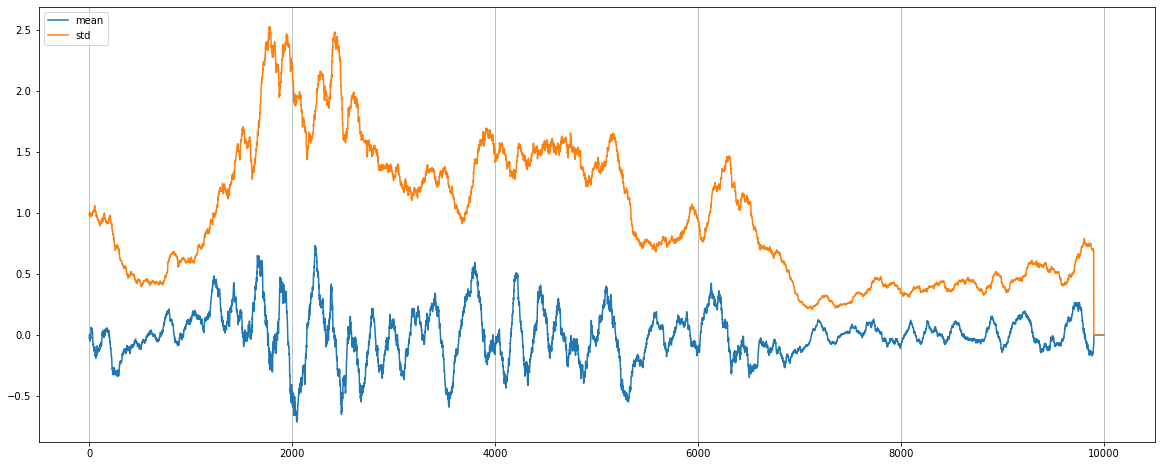

In [7]:
figure=plt.figure(figsize=(20,8))
plt.plot(mean, label='mean')
plt.plot(deviation, label = 'std')
plt.legend(loc="upper left")
plt.grid(axis='x')
plt.savefig('mean_and_deviation_100_running_grid1.pdf')

Here, we can see that the running mean oscillates between -0.5 and 0.5, but the standard deviation changes more significantly. We can guess that the regions with very different values of standard deviation would correspond to different probability distributions.

One famous test to decide whether distributions on different time intervals are different or the same is the Kolmogorov-Smirnov test. In this test, the cumulative distribution functions of empirical distributions corresponding to different intervals are compared. If the distance between them is small, this means that the p-value is large, and it is likely that both intervals correspond to the same probability distribution. Othervise, the p-value is small, and it is most likely that both intervals correspond to different probability distributions.

In the following code, we divide the interval [0:10000] into 20 equal subinteravals of length 500.

We consider i-th subinterval and j-th subinterval.
Then we use Kolmogorov-Smirnov test to decide if i-th subinterval and j-th subinterval have same distribution.

If the p-value of the Kolmogorov-Smirnov test is > 0.05, we add the interval j to the list of intervals which have the same probability distribution as the interval i. The output is the list of lists, where i-th list contains all the intervals which have the same distribution as the interval i.

In [8]:
from scipy.stats import ks_2samp
import numpy as np
list = [[0]]*20
for j in range(0,20):
    x = difference[500*j:500*(j+1)]
    list[j]=[]
    for i in range(0, 20):
        y = difference[500*i :500*(i+1)]
        if  0.05 < ks_2samp(x,y)[1]:
            list[j].append((500*i, 500*(i+1)))
print(list)

[[(0, 500), (5500, 6000), (6500, 7000)], [(500, 1000), (8500, 9000), (9000, 9500), (9500, 10000)], [(1000, 1500)], [(1500, 2000), (2000, 2500)], [(1500, 2000), (2000, 2500)], [(2500, 3000), (4500, 5000), (5000, 5500)], [(3000, 3500), (3500, 4000), (4000, 4500), (4500, 5000), (5000, 5500), (6000, 6500)], [(3000, 3500), (3500, 4000), (4000, 4500), (4500, 5000), (5000, 5500), (6000, 6500)], [(3000, 3500), (3500, 4000), (4000, 4500), (4500, 5000), (5000, 5500)], [(2500, 3000), (3000, 3500), (3500, 4000), (4000, 4500), (4500, 5000), (5000, 5500)], [(2500, 3000), (3000, 3500), (3500, 4000), (4000, 4500), (4500, 5000), (5000, 5500), (6000, 6500)], [(0, 500), (5500, 6000)], [(3000, 3500), (3500, 4000), (5000, 5500), (6000, 6500)], [(0, 500), (6500, 7000)], [(7000, 7500)], [(7500, 8000), (8000, 8500), (8500, 9000)], [(7500, 8000), (8000, 8500), (8500, 9000)], [(500, 1000), (7500, 8000), (8000, 8500), (8500, 9000), (9000, 9500)], [(500, 1000), (8500, 9000), (9000, 9500), (9500, 10000)], [(500, 1

Now we analyze the output: out of the list of lists shown above, find the lists with non-empty intersection, then
form a set equal to the union of those lists.

We can see that the result of the process is: six disjoint sets.
Clearly, those six sets correspond to different distributions according to Kolmogorov - Smirnov test.

Finally, here we summarize the result as a dictionary:

In [9]:
dict = {'distribution 1': [(500,1000), (7500,9999)],
        'distribution 2': [(7000,7500)],
        'distribution 3': [(0,500), (5500, 6000), (6500,7000)],
        'distribution 4': [(2500,5500), (6000, 6500)],
        'distribution 5': [(1500,2500)],
        'distribution 6': [(1000,1500)]}

In [10]:
dict

{'distribution 1': [(500, 1000), (7500, 9999)],
 'distribution 2': [(7000, 7500)],
 'distribution 3': [(0, 500), (5500, 6000), (6500, 7000)],
 'distribution 4': [(2500, 5500), (6000, 6500)],
 'distribution 5': [(1500, 2500)],
 'distribution 6': [(1000, 1500)]}

This dictionary shows that the time interval [0:9999] can be divided into 6 disjoint subsets corresponding to 6 different distributions.

For example, the intervals (500, 1000) and (7500, 9999) correspond to "distribution 1", whereas the interval (7000, 7500) corresponds to "distribution 2".

Now, the goal is to try to identify those 6 different probability distributions.

To classify "distribution 1", we can use the Fitter method, which gives us most likely candidates for the distribution.

,sumsquare_error,aic,bic,kl_div
gennorm,0.154087,652.127464,-29594.924592,inf
logistic,0.162707,590.608605,-29439.687135,inf
dweibull,0.180770,601.507642,-29115.965287,inf
exponnorm,0.191854,711.572031,-28937.485689,inf
norm,0.195081,727.833214,-28895.469569,inf


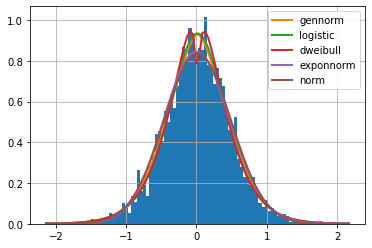

In [22]:
dist1 = difference[500:1000].append(difference[7500:9999])
from fitter import Fitter
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)
f = Fitter(dist1)
f.fit()
f.summary()

We can also plot the histogram of the "distribution 1".

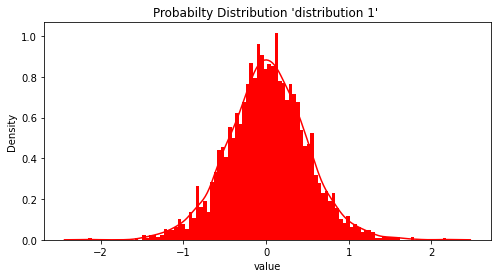

In [13]:
import scipy.stats as stats
import seaborn as sns
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.set_title("Probabilty Distribution 'distribution 1' ")
ax=sns.distplot(dist1, bins=100, kde=True, color='red', hist_kws={'linewidth':15, 'alpha':1})
plt.savefig('distribution1.pdf')
plt.show()

The mean and standard deviation of "distribution 1" are: mean = 0.015 and stdev = 0.477. The 95% confidence interval for the mean is (-0.015, 0.045). The 95% confidence interval for standard deviation is (0.447, 0.507).

In [28]:
dist1.mean()

0.015005001667222408

In [29]:
dist1.std()

0.47660933948393597

Now, we use the Fitter method to clasify "distribution 2".

,sumsquare_error,aic,bic,kl_div
dweibull,6.702270,238.915263,-2137.437094,inf
dgamma,7.069141,231.307060,-2110.790773,inf
burr12,7.392701,242.772130,-2082.199064,inf
loggamma,7.405006,244.541792,-2087.582074,inf
powernorm,7.414391,243.934606,-2086.948815,inf


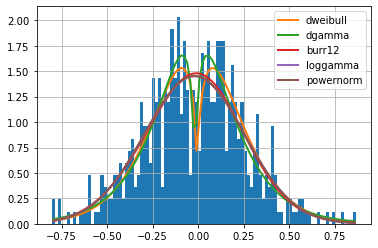

In [21]:
dist2=difference[7000:7500]
from fitter import Fitter
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)
f = Fitter(dist2)
f.fit()
f.summary()

The mean and standard deviation of the "distribution 2" are: mean = -0.024 and stdev =0.275. The 95% confidence interval for the mean is (-0.048, 0.0001). The 95% confidence interval for standard deviation is (0.251, 0.299).

In [30]:
dist2.mean()

-0.02376559999999999

In [31]:
dist2.std()

0.2749983052172955

We can also plot the histogram of "distribution 2".

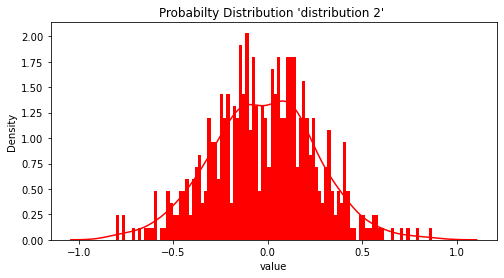

In [15]:
import scipy.stats as stats
import seaborn as sns
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.set_title("Probabilty Distribution 'distribution 2' ")
ax=sns.distplot(dist2, bins=100, kde=True, color='red', hist_kws={'linewidth':15, 'alpha':1})
plt.savefig('distribution2.pdf')
plt.show()

We can use the Fitter method to classify "distribution 3".

,sumsquare_error,aic,bic,kl_div
gennorm,0.311901,517.905689,-12695.497319,inf
t,0.312607,520.539897,-12692.105425,inf
logistic,0.314258,506.236583,-12691.513670,inf
genlogistic,0.317003,508.578951,-12671.158038,inf
exponnorm,0.330439,529.989794,-12608.890104,inf


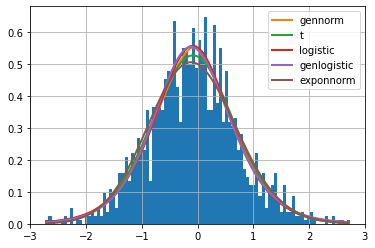

In [20]:
dist3=difference[0:500].append(difference[5500:6000]).append(difference[6500:7000])
from fitter import Fitter
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)
f = Fitter(dist3)
f.fit()
f.summary()

We can plot a histogram of "distribution 3".

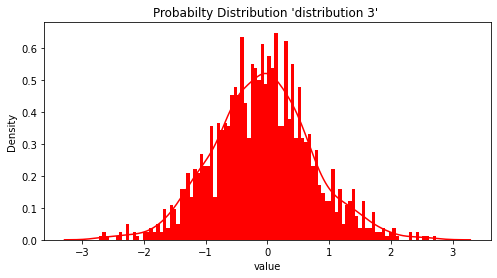

In [17]:
import scipy.stats as stats
import seaborn as sns
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.set_title("Probabilty Distribution 'distribution 3' ")
ax=sns.distplot(dist3, bins=100, kde=True, color='red', hist_kws={'linewidth':15, 'alpha':1})
plt.savefig('distribution3.pdf')
plt.show()

The "distribution 3" has mean = -0.081 and stdev = 0.801. The 95% confidence interval for the mean is (-0.122, -0.04). The 95% confidence interval for standard deviation is (0.76, 0.842).

In [34]:
dist3.mean()

-0.0813098

In [35]:
dist3.std()

0.8006416041668342

We can classify "distribution 4" using the Fitter method.

,sumsquare_error,aic,bic,kl_div
gennorm,0.015232,774.651498,-43182.540833,inf
norm,0.015697,797.296473,-43085.481042,inf
exponnorm,0.015699,799.273508,-43076.952257,inf
logistic,0.022314,714.721286,-41854.309375,inf
hypsecant,0.038715,691.996473,-39925.821151,inf


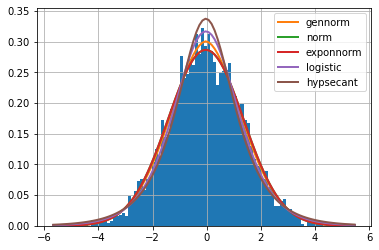

In [19]:
dist4=difference[2500:5500].append(difference[6000:6500])
from fitter import Fitter
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)
f = Fitter(dist4)
f.fit()
f.summary()

The mean and standard deviation for "distribution 4" are mean = -0.034 and stdev = 1.392. The 95% confidence interval for the mean is (-0.08, 0.012). The 95% confidence interval for standard deviation is (1.346, 1.438).

In [36]:
dist4.mean()

-0.03404154285714286

In [37]:
dist4.std()

1.391536666005557

We can use the stats library to plot the histogram of "distribution 4".

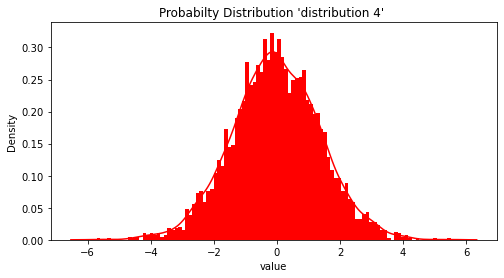

In [25]:
import scipy.stats as stats
import seaborn as sns
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.set_title("Probabilty Distribution 'distribution 4' ")
ax=sns.distplot(dist4, bins=100, kde=True, color='red', hist_kws={'linewidth':15, 'alpha':1})
plt.savefig('distribution4.pdf')
plt.show()

The easy way to see that "distribution 1", "distribution 2", "distribution 3" and "distribution 4" are different distributions, is to notice that the 95% confidence intervals for standard deviation are disjoint.

We use the Fitter method to classify "distribution 5".

,sumsquare_error,aic,bic,kl_div
gennorm,0.034301,689.522928,-10259.622638,inf
logistic,0.034602,682.955126,-10257.772070,inf
hypsecant,0.038527,673.974854,-10150.338712,inf
norm,0.041268,703.953295,-10081.610645,inf
dweibull,0.044435,681.989180,-10000.764319,inf


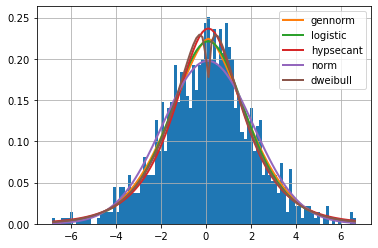

In [23]:
dist5 = difference[1500:2500]
from fitter import Fitter
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)
f = Fitter(dist5)
f.fit()
f.summary()

We can calculate the sample mean and standard deviation of "distribution 5": mean = 0.079 and stdev = 2.02. The 95% confidence interval for the mean is (-0.046, 0.204). The 95% confidence interval for standard deviation is (1.895, 2.145).

In [38]:
dist5.mean()

0.07921699999999998

In [39]:
dist5.std()

2.0199535153352195

We can plot a histogram of "distribution 5".

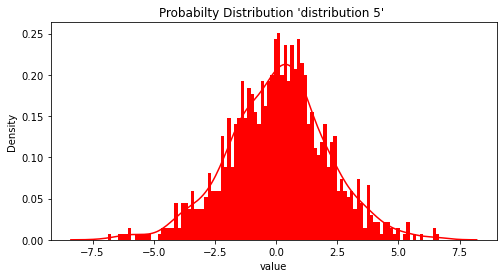

In [26]:
import scipy.stats as stats
import seaborn as sns
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.set_title("Probabilty Distribution 'distribution 5' ")
ax=sns.distplot(dist5, bins=100, kde=True, color='red', hist_kws={'linewidth':15, 'alpha':1})
plt.savefig('distribution5.pdf')
plt.show()

The time interval [1000:1500] is classified as "distribution 6".

Use the Fitter method to classify "distribution 6".

,sumsquare_error,aic,bic,kl_div
genhyperbolic,0.441572,645.921327,-3484.938303,inf
norminvgauss,0.455083,638.588476,-3476.083221,inf
johnsonsu,0.460298,640.716531,-3470.386466,inf
gennorm,0.461379,632.993584,-3475.427698,inf
hypsecant,0.463456,627.716768,-3479.396932,inf


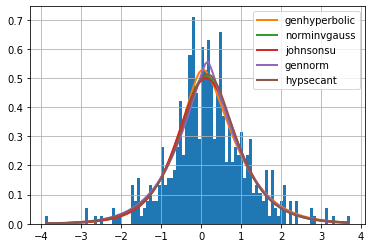

In [24]:
dist6 = difference[1000:1500]
from fitter import Fitter
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger().setLevel(logging.ERROR)
f = Fitter(dist6)
f.fit()
f.summary()

The sample mean and standard deviation of "distribution 6" are: mean = 0.182 and stdev = 0.969. The 95% confidence interval for the mean is (0.097, 0.267). The 95% confidence interval for standard deviation is (0.884, 1.054).

In [40]:
dist6.mean()

0.18219240000000003

In [41]:
dist6.std()

0.9692203499492521

The histogram of "distribution 6" is:

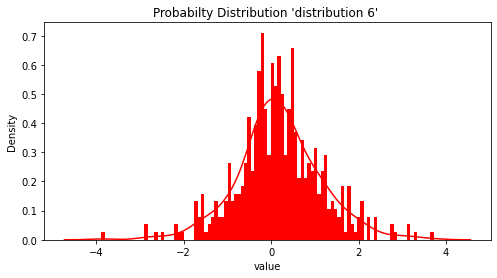

In [27]:
import scipy.stats as stats
import seaborn as sns
figure = plt.figure(figsize = (8,4))
subplot = plt.subplot()
subplot.set_title("Probabilty Distribution 'distribution 6' ")
ax=sns.distplot(dist6, bins=100, kde=True, color='red', hist_kws={'linewidth':15, 'alpha':1})
plt.savefig('distribution6.pdf')
plt.show()

We observe that while Kolmogorov-Smirnov test is an excellent way to divide the time interval [0:9999] into subintervals corresponding to different distributions, comparing the 95% confidence intervals for standard deviation is a much faster way to establish whether two intervals correspond to different distributions.

For example, here we can see that 95% confidence intervals for standard deviation are disjoint, and therefore "distribution 1", "distribution 2", "distribution 3", "distribution 4", "distribution 5" and "distribution 6" are different distributions.

To summarize, we can use Kolmogorov-Smirnov test on the one-step differences of the data to discover that the data set can be split into six disjoint subsets, belonging to different distributions.

Each distribution can be matched with existing distributions using the Fitter method.

A much faster way to divide the data set into different distributions is to calculate the running mean and standard deviation for a window of width 100. 

If the 95% confidence intervals for the standard deviation are disjoint, then we are 95% sure that we are dealing with different distributions.

This work is by Anastasia Ruzmaikina.